In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np


from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [3]:
from zipfile import ZipFile

data_path = '/content/archive (1) (1).zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [11]:
path = '/content/dogs_vs_cats/test'
classes = os.listdir(path)
classes


['dogs', 'cats']

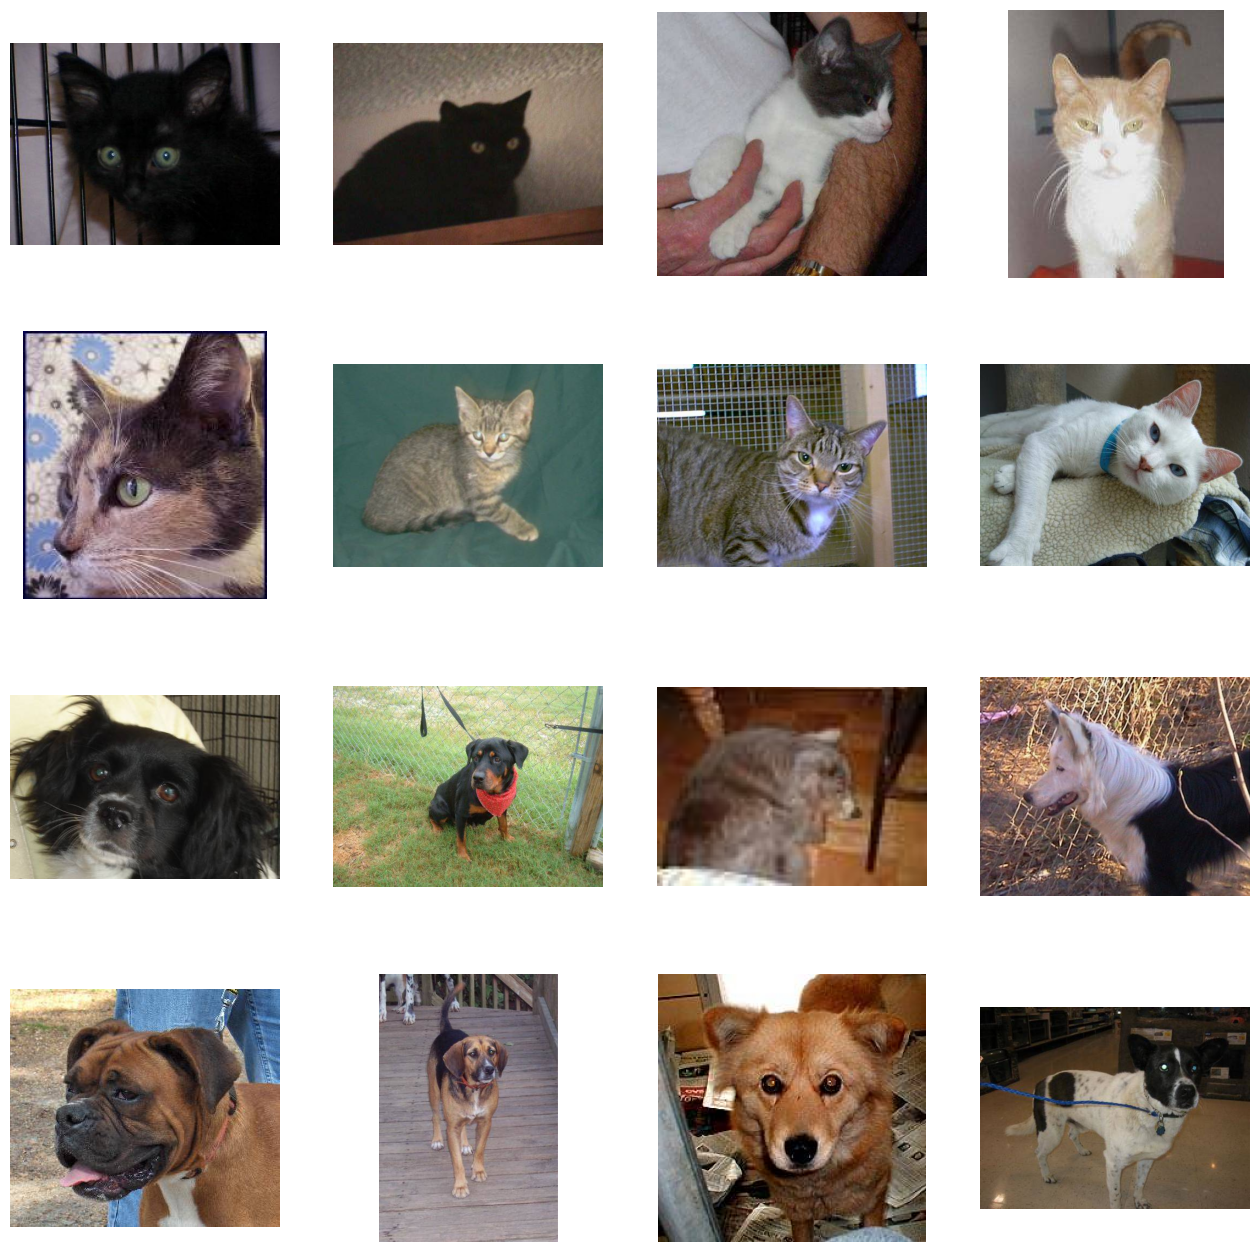

In [12]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/dogs_vs_cats/test/cats')
dog_dir = os.path.join('/content/dogs_vs_cats/test/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [14]:
base_dir = '/content/dogs_vs_cats/test/'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 5000 files belonging to 2 classes.
Using 4500 files for training.
Found 5000 files belonging to 2 classes.
Using 500 files for validation.


In [16]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

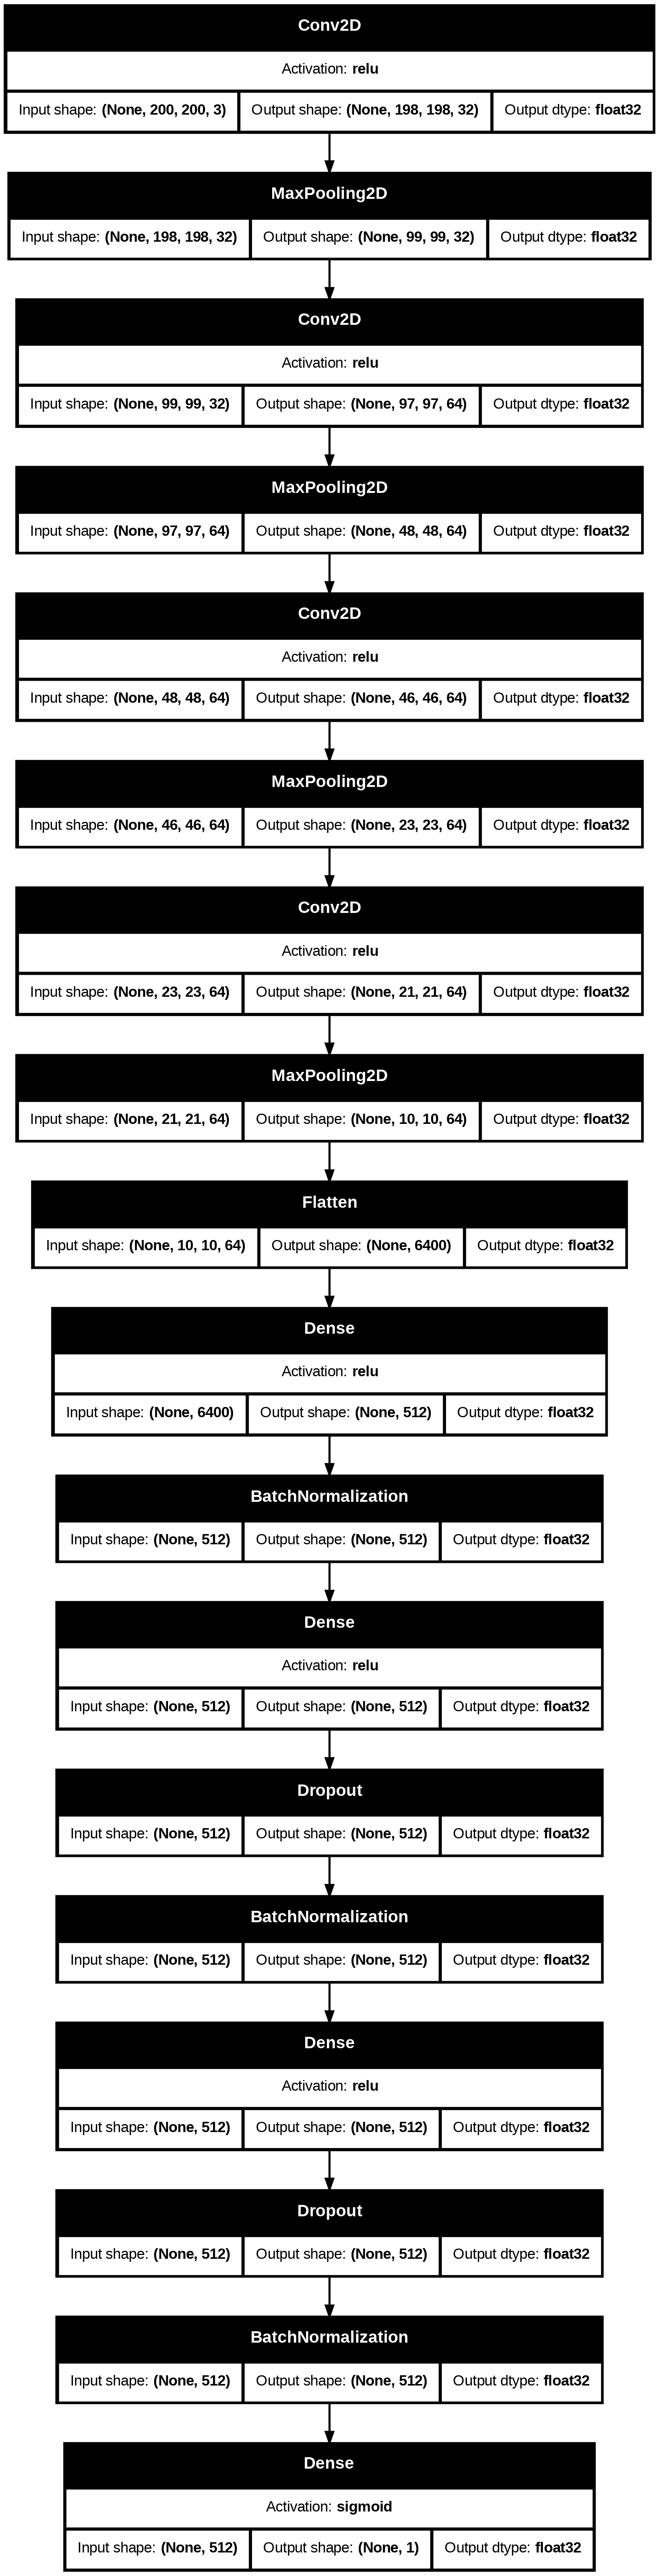

In [17]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [18]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [19]:
history = model.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.5467 - loss: 0.8521 - val_accuracy: 0.5760 - val_loss: 0.7574
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 364s 3s/step - accuracy: 0.5897 - loss: 0.7104 - val_accuracy: 0.5020 - val_loss: 1.6907
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.5922 - loss: 0.7014 - val_accuracy: 0.5360 - val_loss: 0.8056
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.6263 - loss: 0.6604 - val_accuracy: 0.5180 - val_loss: 0.9835
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.6626 - loss: 0.6295 - val_accuracy: 0.5280 - val_loss: 0.9429
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.6896 - loss: 0.5884 - val_accuracy: 0.6660 - val_loss: 0.6946
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 373s 3s/step - accuracy: 0.7304 - loss: 0.5531 - val_accuracy: 0.5020 - val_loss: 9.4849
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.6808 - loss: 0.6067 - val_accu

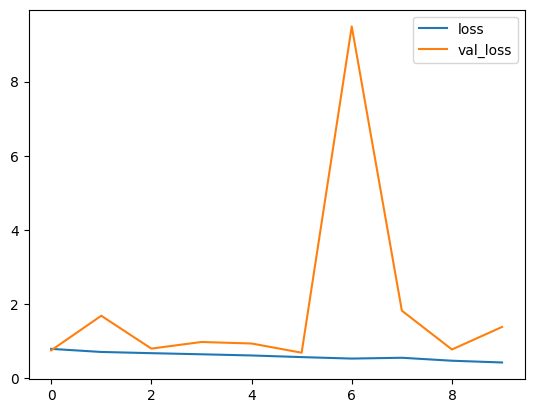

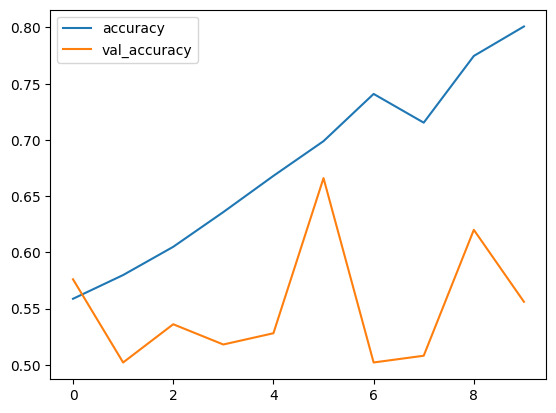

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Cat


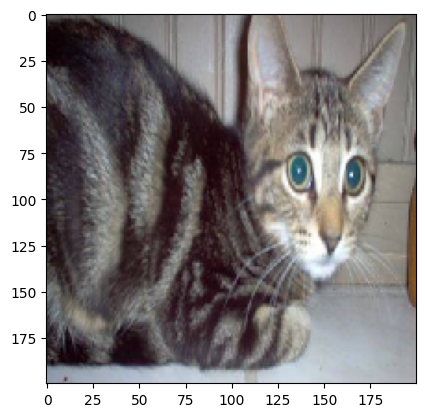

In [34]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/dogs_vs_cats/test/cats/cat.11616.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
  print("Dog")
else:
  print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dog


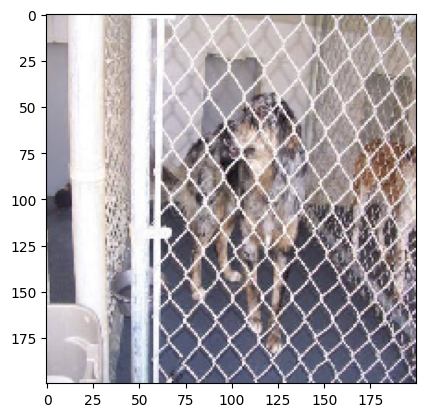

In [32]:
test_image = image.load_img('/content/dogs_vs_cats/test/dogs/dog.10072.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")
